# Le Grand Debat : Focus sur la transition écologique

### Import des librairies

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator


### Fonction pour la création de graphes

In [38]:
def graph_pie(labels, values, colors, title, explode, name_export):
    fig1, ax1 = plt.subplots()
    ax1.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    fig1.savefig("output/"+name_export+".png", dpi=300)
    
def graph_bar(labels, values, title, name_export):
    fig1, ax1 = plt.subplots()
    y_pos = np.arange(len(labels))
    plt.xticks(y_pos, labels)
    ax1.bar(y_pos, values, color='#99ff99')
    plt.title(title)
    plt.show()
    fig1.savefig("output/"+name_export+".png", dpi=300)
    
stop_words = ["de","la","c'est","du","pour","ce","les","lié","des","ou","et","tout","est","un","sont","tous","ci","dans","le",
             "il","faut","qui","que","n'y","pas","ces","ne","peut","par","toute","donc","mai","mais","leur","non","comme","une",
             "plus","important","trop","se","sur","fait","ceraines","problème","problèmes", "en", "place","commun","exemple",
             "France","avec","au","niveau",'aussi',"etc","doit","etre","cela","soit","bien","autre","même","nottament","si",
             "alors","car","autres","mettre","je","fais","ecologique","aide","solution","citoyen","elle","san","beaucoup","notamment",
             "surtout","faire","n'est","écologique","pourquoi","an","doivent","on","encore","avoir","rien","sans","moi","me","déjà",
             "nous","l'état","faudrait","temp","celle","françai","ex","peu","dont","monde","déjà","ma","être","serait","possible",
             "aujourd'hui","également","ainsi","français","toujour","pourrait","nécessaire","quand","possible","voir","ça",
             "possible","voir","personne","semble","ceux","ont","ils","liés","cette","certain","très","point","semble",
             "sui","mes","peux","ans","chose","km","qu'il","ca","j'ai","aucune","toutes","sais","no","vou","pourrai","toujours",
             "chacun","cas","nos","somme","avons","afin","qu","vous"]

def word_cloud(text, name_export):
    wordcloud = WordCloud(stopwords = stop_words, max_font_size=50, background_color="white", width=800, height=400).generate(text)
    plt.figure(figsize=[20,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("output/"+name_export+".png")

## Recuperation des données

Lien pour accèder aux données : https://www.kaggle.com/jlesuffleur/granddebat

In [3]:
democratie_citoyennete = pd.read_csv('sources/DEMOCRATIE_ET_CITOYENNETE.csv', dtype=str)
fiscalite_dp = pd.read_csv('sources/LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv', dtype=str)
transition_ecologique = pd.read_csv('sources/LA_TRANSITION_ECOLOGIQUE.csv', dtype=str)
organisation_etat_sv = pd.read_csv('sources/ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS.csv', dtype=str)

## Analyse : Répartition des données

In [5]:
size_democratie_citoyennete = democratie_citoyennete.count()['id']
size_fiscalite_dp = fiscalite_dp.count()['id']
size_transition_ecologique = transition_ecologique.count()['id']
size_organisation_etat_sv = organisation_etat_sv.count()['id']

total_row = size_democratie_citoyennete+size_fiscalite_dp+size_transition_ecologique+size_organisation_etat_sv

print("Nombre de contributions pour :")
print("- Democratie et citoyenneté : "+str(size_democratie_citoyennete))
print("- Fiscalité et dépenses publiques : "+str(size_fiscalite_dp))
print("- Transition écologique : "+str(size_transition_ecologique))
print("- Organisation de l'état et des services publics : "+str(size_organisation_etat_sv))

Nombre de contributions pour :
- Democratie et citoyenneté : 116549
- Fiscalité et dépenses publiques : 186711
- Transition écologique : 153809
- Organisation de l'état et des services publics : 111953


Il y a donc eu 153809 contributions dans la transition écologique. Comparé à la taille de la population française, ce chiffre est bas. Cependant, il constitue une bonne base pour la suite de l'analyse. 

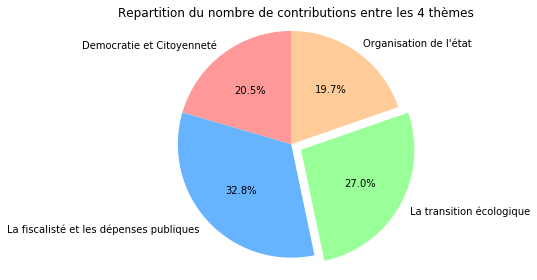

In [6]:
labels = ['Democratie et Citoyenneté','La fiscalisté et les dépenses publiques',
          'La transition écologique', "Organisation de l'état"]
values = [size_democratie_citoyennete/total_row,size_fiscalite_dp/total_row,
             size_transition_ecologique/total_row,size_organisation_etat_sv/total_row]
explode = (0, 0, 0.1, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
title = 'Repartition du nombre de contributions entre les 4 thèmes'
name_export="repartition_themes"
graph_pie(labels, values, colors, title, explode, name_export)

Avant même de commencer l'analyse plus profonde du jeu de données sur la transition écologique, nous pouvons constater que les problèmatiques sur l'environnement sont importantes pour les Français : 2ème thème avec le plus de contributions !

### Proportion du nombre de contributions dans la transition écologique par département

In [20]:
# Recuperation du nombre de contributions par département pour chaque thème
list_df = [transition_ecologique,organisation_etat_sv,fiscalite_dp,democratie_citoyennete]
list_name_df=['transition_ecologique','organisation_etat_sv','fiscalite_dp','democratie_citoyennete']
list_count_df = []
i=0
for df in list_df:
    # Récupération du code département
    df['code_dep'] = [str(code_postal)[:2] for code_postal in df.authorZipCode]
    # DF contenant le nombre de contribution par departement pour un theme pazrticulier
    count_dep = df.groupby('code_dep').count()['id'].rename(list_name_df[i])
    
    list_count_df.append(count_dep)
    i+=1

# Concatenation des contributions de tous les thèmes avec le code département
df_count_dep = pd.concat(list_count_df, axis=1, sort=False)

# Calcul du pourcentage de contribution faites pour l'ecologie
df_count_dep['pourcentage'] = [((row['transition_ecologique'])/(row['organisation_etat_sv']+row['fiscalite_dp']+row['democratie_citoyennete']+row['transition_ecologique']))*100 
                               for index, row in df_count_dep.iterrows()]

#Suppresion des codes inexactes et ajout des deux codes du département 69
df_count_dep = df_count_dep.drop(['-1','0','3','4','5','6','7','8','-9','na'])
df_count_dep.loc['69D'] = df_count_dep.loc['69']
df_count_dep.loc['69M'] = df_count_dep.loc['69']

df_count_dep.head()

,transition_ecologique,organisation_etat_sv,fiscalite_dp,democratie_citoyennete,pourcentage
00,147.0,92.0,178.0,130.0,26.873857
01,1559.0,1154.0,1749.0,1182.0,27.622254
02,638.0,458.0,820.0,465.0,26.795464
03,617.0,469.0,836.0,468.0,25.815900
04,545.0,403.0,629.0,418.0,27.318296


Lien pour récupérer les données : https://www.data.gouv.fr/fr/datasets/decoupage-administratif-communal-francais-issu-d-openstreetmap/

In [14]:
df_count_dep.count()['pourcentage']

101

In [17]:
# Recuperation des formes des départements et fusion des deux dataframes

map_df = gpd.read_file('sources/dep_fr.shp')
merged = map_df.set_index('code_insee').join(df_count_dep)

C:\Users\Yoann\Miniconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


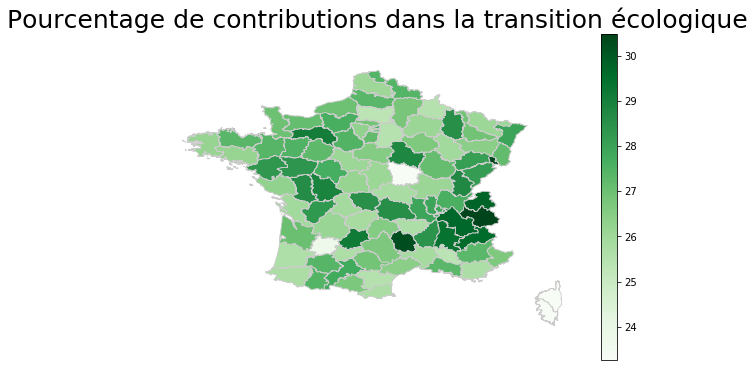

In [21]:
# Variable utilisé pour les valeurs de la map
variable = 'pourcentage'

# Min et max pour la légende
vmin, vmax = merged[variable].min(), merged[variable].max()

# Création du graphique
fig, ax = plt.subplots(1, figsize=(10, 6))
# Zoom sur la France métropolitaine
ax.axis([-5,10,40,52.5])
ax.axis('off')
ax.set_title('Pourcentage de contributions dans la transition écologique', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Ajout de la légende
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [22]:
# Export du graphe
fig.savefig("output/map_dep.png", dpi=300)

## Analyse du jeu de donnée sur la transition écologique

Comme expliqué ci-dessus, il existe 153809 contributions. Cela représente 27% du total des contributions lors du grand débat national.

Regardons de plus près à quoi ressemble notre jeu de données.


In [23]:
transition_ecologique.head()

,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,QUXVlc3Rpb246MTYw - Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?,QUXVlc3Rpb246MTYx - Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?,QUXVlc3Rpb246MTQ2 - Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?,"QUXVlc3Rpb246MTQ3 - Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?","QUXVlc3Rpb246MTQ4 - À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?","QUXVlc3Rpb246MTQ5 - Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?","QUXVlc3Rpb246MTUw - Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",QUXVlc3Rpb246MTUx - Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?,"QUXVlc3Rpb246MTUy - Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?","QUXVlc3Rpb246MTUz - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?","QUXVlc3Rpb246MTU0 - Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?","QUXVlc3Rpb246MTU1 - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?","QUXVlc3Rpb246MjA3 - Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",QUXVlc3Rpb246MTU3 - Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?,QUXVlc3Rpb246MTU4 - Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?,QUXVlc3Rpb246MTU5 - Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?,code_dep
0,UHJvcG9zYWw6ZmZlN2MwNzktMWUyMC0xMWU5LTk0ZDItZm...,2-4,transition écologique,2019-01-22 09:37:49,2019-01-22 09:37:49,NaN,false,NaN,VXNlcjoxMTQwMTc0YS0xZTFmLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,97231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enseignement du tri sélectif à l'école,Multiplier les centrales géothermiques,97
1,UHJvcG9zYWw6M2RmZmUxZjMtMWUyMS0xMWU5LTk0ZDItZm...,2-5,La surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,NaN,false,NaN,VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,57000,Les problèmes auxquels se trouve confronté l’e...,Les problèmes auxquels se trouve confronté l’e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mettre en oeuvre au niveau national ses engage...,Les problèmes auxquels se trouve confronté l’e...,57
2,UHJvcG9zYWw6NDg1YWUxYjItMWUyMS0xMWU5LTk0ZDItZm...,2-6,climat,2019-01-22 09:39:50,2019-01-22 09:39:50,NaN,false,NaN,VXNlcjozZjlhNzAwOS0xYTc2LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,34140,"Les dérèglements climatiques (crue, sécheresse)",pour éviter les inondations obliger les rivera...,Non,NaN,Non,NaN,"développer les transports en commun ,",NaN,Non,NaN,Oui,NaN,Les transports en commun|L'auto partage|Le tra...,NaN,NaN,NaN,34
3,UHJvcG9zYWw6NTk2Nzk5MmItMWUyMS0xMWU5LTk0ZDItZm...,2-7,POLLUTION AIR EAU,2019-01-22 09:40:19,2019-01-22 09:40:19,NaN,false,NaN,VXNlcjozOWQwNzJjNC0xZDEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,17400,La pollution de l'air,Il faut taxer les gros pollueurs : Entreprises...,Non,NaN,Non,NaN,NaN,Plus de transports publics dans les petites co...,Non,NaN,Non,Le co-voiturage ne correspond pas toujours au

### Nettoyage des données

Plusieurs colonnes ne nous seront pas utiles pour la suite, nous pouvons les supprimer dès maintenant

In [24]:
data_clean = transition_ecologique.drop(['id','reference','createdAt','publishedAt','updatedAt','trashed','trashedStatus','authorId','authorType','code_dep','authorZipCode'], axis=1)
data_clean.columns=['title',
                    "Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?",
                    "Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?",
                    "Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?",
                    "Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?",
                    "À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?",
                    "Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?",
                    "Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",
                    "Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?",
                    "Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?",
                    "Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?",
                    "Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?",
                    "Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?",
                    "Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",
                    "Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?",
                    "Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?",
                    "Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?"]
size_file = data_clean.count()['title']
data_clean = data_clean.fillna('')
data_clean.head()

,title,Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?,Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?,Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?,"Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?","À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?","Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?","Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?,"Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?","Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?","Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?","Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?","Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?,Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?,Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?
0,transition écologique,,,,,,,,,,,,,,,Enseignement du tri sélectif à l'école,Multiplier les centrales géothermiques
1,La surpopulation,Les problèmes auxquels se trouve confronté l’e...,Les problèmes auxquels se trouve confronté l’e...,,,,,,,,,,,,,Mettre en oeuvre au niveau national ses engage...,Les problèmes auxquels se trouve confronté l’e...
2,climat,"Les dérèglements climatiques (crue, sécheresse)",pour éviter les inondations obliger les rivera...,Non,,Non,,"développer les transports en commun ,",,Non,,Oui,,Les transports en commun|L'auto partage|Le tra...,,,
3,POLLUTION AIR EAU,La pollution de l'air,Il faut taxer les gros pollueurs : Entreprises...,Non,,Non,,,Plus de transports publics dans les petites co...,Non,,Non,Le co-voiturage ne correspond pas toujours aux...,Les transports en commun,L'Etat,Elle n'a aucun pouvoir. Impossible de contrain...,
4,Economie vs Ecologie,La biodiversité et la disparition de certaines...,"Changer notre mode de vie, impulser une nouvel...",Oui,"Pollution de l'air, pollution de nos aliments,...",Oui,"En consommant autrement, en vivant autrement.","Aménagement de piste cyclable, développement d...","Détaxer le mode de chauffage écologique, une a...",Oui,une aide significative pour de l'éolien ou du ...,Non,Une piste cyclable pour éviter de risquer ma v...,Les transports en commun|Le covoiturage|Le vélo,"La commune, le département, la région",Demander à Nicolas Hulot,Une vrai politique écologique et non économique


### Analyse des données

Commençons par traiter la première question :
- Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?


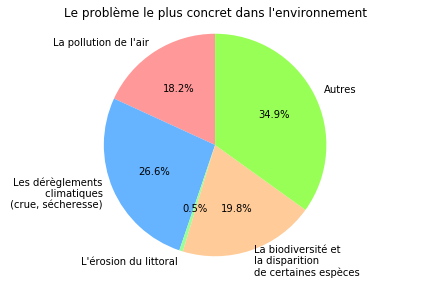

In [25]:
list_q1_possible_rep = ["La pollution de l'air","Les dérèglements climatiques (crue, sécheresse)","L'érosion du littoral","La biodiversité et la disparition de certaines espèces"] 
q1 = "Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?"
data_q1 = data_clean[data_clean[q1]!=""]
nb_rep_q1 = data_q1.count()['title']
values = []

# Récuperation du pourcentage de réponses pour chaque possiblité
for possible_rep in list_q1_possible_rep:
    size_rep = data_q1[data_q1[q1]==possible_rep].count()['title']
    pourcentage_rep = (size_rep/nb_rep_q1)*100
    values.append(pourcentage_rep)
    
values.append(100-sum(values))

labels = ["La pollution de l'air","Les dérèglements\n climatiques\n (crue, sécheresse)",
         "L'érosion du littoral","La biodiversité et \nla disparition \nde certaines espèces",
         "Autres"]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#98ff56']
title = "Le problème le plus concret dans l'environnement"
explode = (0, 0, 0, 0, 0)
name_export = "problemes_plus_concret"
graph_pie(labels, values, colors, title, explode, name_export)

Pour voir plus en détails ce qu'on pu exprimer les contributeurs dans la section "Autres", utilisons le nuage de mots. 

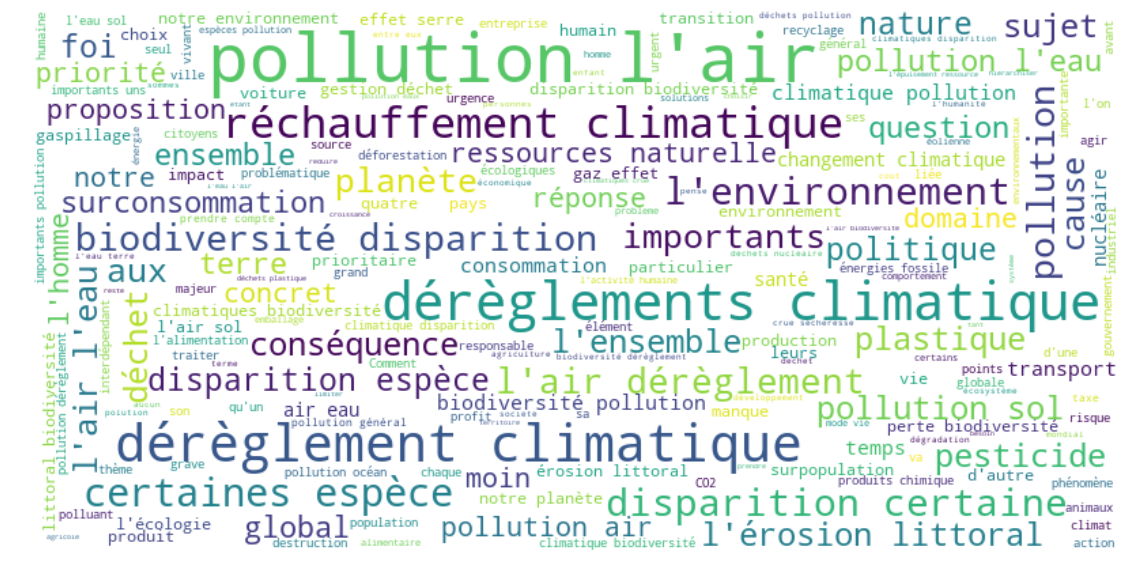

In [39]:
data_q1_autres = data_clean[~data_clean[q1].isin(list_q1_possible_rep)]
# Recuperation de toutes les réponses en une seule variable
text = " ".join(review for review in data_q1_autres[q1])
word_cloud(text,'autre_theme')

Ce nuage de mots n'apporte pas vraiment de nouvelles problèmatiques autres que celles énoncées dans le document. En effet, la plupart des themes ressortent dans le nuage. A noter tout de même l'apparition de certains mots autour des déchets et de la surconsommation.

Etant donnée que la part "Autres" prend 35% des données, il est compliqué de ressortir le problème le plus concret. D'après le graphe et le nauge de mots, on peu quand même estimer que le problème le plus concret pour les contributeurs est lié aux déreglements climatiques. Aussi, nous pouvons constater que l'érosion du littoral ne fait pas parti des problèmes majeurs sur l'environnement pour les français.

### Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?

62.199871268911444 27.887184755118362 9.912943975970197


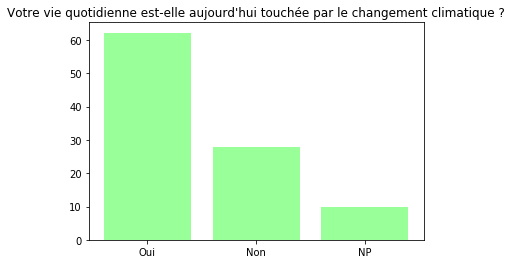

In [43]:
q="Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?"
yes = (data_clean[data_clean[q]=="Oui"].count()['title']/size_file)*100
no = (data_clean[data_clean[q]=="Non"].count()['title']/size_file)*100
no_answer = (data_clean[data_clean[q]==""].count()['title']/size_file)*100
graph_bar(['Oui','Non','NP'],[yes,no,no_answer],"Votre vie quotidienne est-elle aujourd'hui touchée par le changement climatique ?",'vie_quotidienne_touchée_oui_non')

### Pensez vous pouvoir contribuer à protéger l'environnement ?

85.97806370238412 4.232522154100215 9.789414143515659


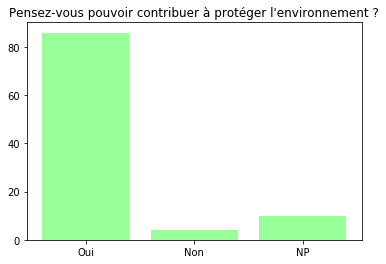

In [44]:
q="À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?"
yes = (data_clean[data_clean[q]=="Oui"].count()['title']/size_file)*100
no = (data_clean[data_clean[q]=="Non"].count()['title']/size_file)*100
no_answer = (data_clean[data_clean[q]==""].count()['title']/size_file)*100
print(yes,no,no_answer)

graph_bar(['Oui','Non','NP'],[yes,no,no_answer],"Pensez-vous pouvoir contribuer à protéger l'environnement ?",'contribution_oui_non')

Même si une majorité de personnes affirme que sa vie est impactée par le changement climatique, il reste agréablement surprenant de voir que la plupart d'entres eux pensent pouvoir contribuer à préserver l'environnement.


Maintenant, regardons quelles sont les solutions apportées pour répondre à ces problèmatiques. Pour faire ces analyses seulement basées sur du texte, je n'utiliserais pas d'outils lié au NLP (Natural Language Processing). C'est un sujet compliqué et encore plus pour la langue Française. Cela fera peut être l'objet d'une autre analyse plus tard.

Comme précédemment, je vais me baser sur le nuage de mots. Ce type de graphe est très facilement compréhensible et permet de ressortir les idées générales.

### Que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?

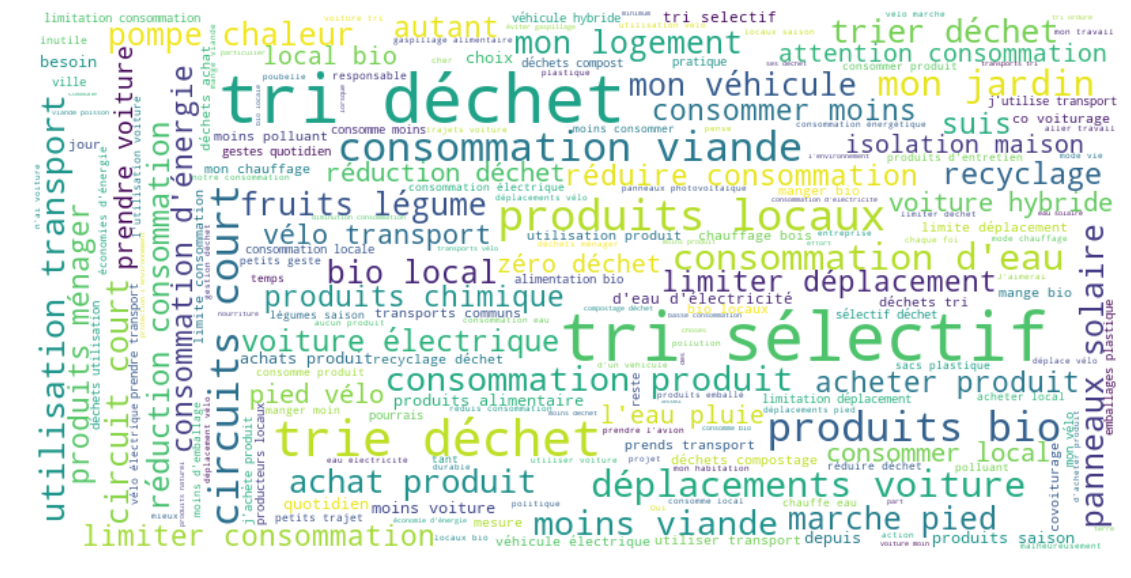

In [40]:
q="Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?"
text = " ".join(review for review in data_clean[q])
word_cloud(text, 'action_word_cloud')

### Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?

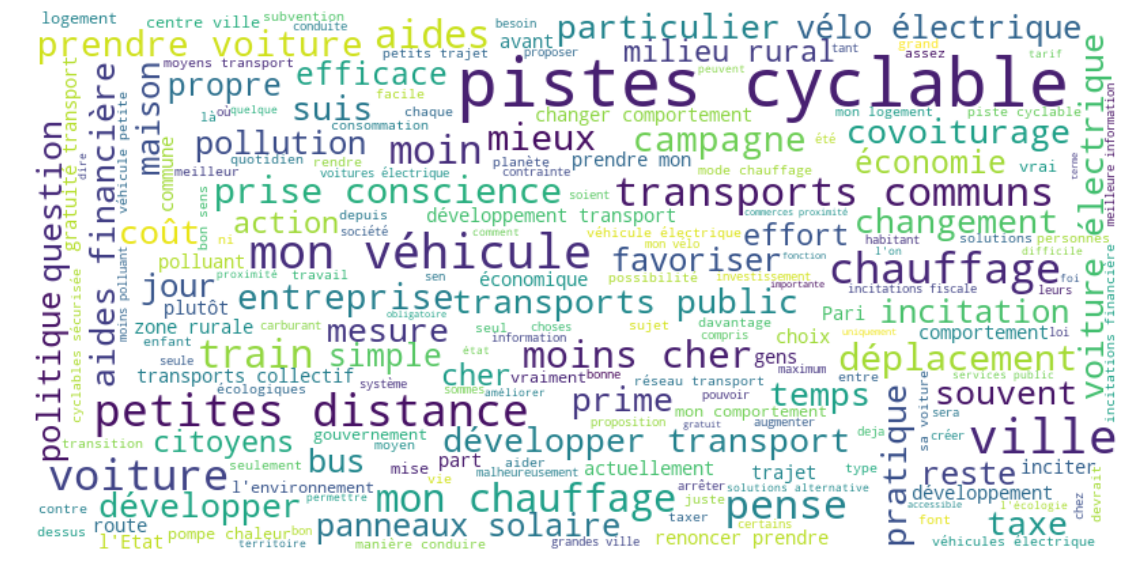

In [41]:
q="Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?"
text = " ".join(review for review in data_clean[q])
word_cloud(text, 'incitation_word_cloud')

### Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?

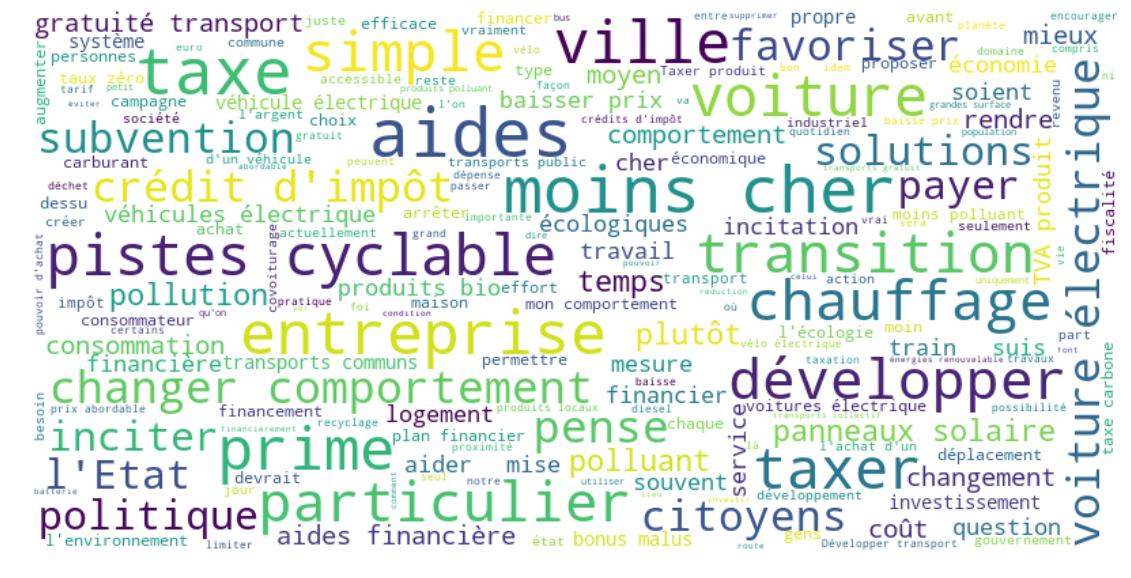

In [42]:
q="Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?"
text = " ".join(review for review in data_clean[q])
word_cloud(text, "solutions_supportables_word_cloud")

Voila mon analyse du jeu de données de la transition écologique sur le grand débat national. J'ai décidé de me limiter à quelques questions car je trouve que certaines d'entres elles ont des réponses redondantes.

L'analyse de texte reste très limité et, comme expliqué plus haut, je pense qu'il serait très intéressant de se pencher sur des outils de NLP pour analyser plus en profondeur ces questions.